<a href="https://colab.research.google.com/github/rmontenegroo/discursos/blob/main/nlp_discursos_camara_extracao_e_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulos

In [ ]:
import requests
import json
import os
import base64
import zlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parâmetros

In [ ]:
ROOTDIR = '/content/drive/MyDrive/Pós/discursos/'

# Montando drive para salvar dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Extração dos dados

## Obtendo as legislaturas da câmara

In [ ]:
legislaturas = pd.read_csv('https://dadosabertos.camara.leg.br/arquivos/legislaturas/csv/legislaturas.csv', index_col='idLegislatura', sep=';')

In [ ]:
legislaturas

,uri,dataInicio,dataFim,anoEleicao
idLegislatura,,,,
56,https://dadosabertos.camara.leg.br/api/v2/legi...,2019-02-01,2023-01-31,2018
55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,2014
54,https://dadosabertos.camara.leg.br/api/v2/legi...,2011-02-01,2015-01-31,2010
53,https://dadosabertos.camara.leg.br/api/v2/legi...,2007-02-01,2011-01-31,2006
52,https://dadosabertos.camara.leg.br/api/v2/legi...,2003-02-01,2007-01-31,2002
51,https://dadosabertos.camara.leg.br/api/v2/legi...,1999-02-01,2003-01-31,1998
50,https://dadosabertos.camara.leg.br/api/v2/legi...,1995-02-01,1999-01-31,1994
49,https://dadosabertos.camara.leg.br/api/v2/legi...,1991-02-01,1995-01-31,1990
48,https://dadosabertos.camara.leg.br/api/v2/legi...,1987-02-01,1991-01-31,1986


## Obtendo os IDs dos deputados das legislaturas

In [ ]:
deputados = pd.read_csv('https://dadosabertos.camara.leg.br/arquivos/deputados/csv/deputados.csv', sep=';')

In [ ]:
deputados['idDeputado'] = deputados.uri.map(lambda u: int(u.split('/')[-1]))

In [ ]:
deputados = deputados.set_index('idDeputado')

In [ ]:
deputados.tail(10)

,uri,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento
idDeputado,,,,,,,,,,,,,
217480,https://dadosabertos.camara.leg.br/api/v2/depu...,Jones Moura,56,56,JONES BARBOSA DE MOURA,NaN,M,ascomvereadorjonesmoura@gmail.com,NaN,1974-06-16,NaN,RJ,Rio de Janeiro
218086,https://dadosabertos.camara.leg.br/api/v2/depu...,Ely Santos,56,56,ELIANE DE SOUSA ALVES MACHADO,NaN,F,"https://pt-br.facebook.com/oficialelysantos/, ...",NaN,1977-01-13,NaN,SP,São Paulo
218245,https://dadosabertos.camara.leg.br/api/v2/depu...,Jorielson,56,56,JORIELSON BRITO NASCIMENTO,NaN,M,"jorielson.jbn@gmail.com, Jorielson.Sandra, j...",NaN,1980-07-11,NaN,AP,Macapá
218741,https://dadosabertos.camara.leg.br/api/v2/depu...,Patrick Dorneles,56,56,PATRICK TEIXEIRA DORNELES PIRES,NaN,M,patricktdp@gmail.com,NaN,1997-03-30,NaN,RS,Porto Alegre
218879,https://dadosabertos.camara.leg.br/api/v2/depu...,Nelho Bezerra,56,56,FRANCISCO NELHO BEZERRA,NaN,M,NaN,NaN,1970-04-20,NaN,CE,Iguatu
219413,https://dadosabertos.camara.leg.br/api/v2/depu...,Guimarães,14,14,MANOEL PEREIRA GUIMARÃES,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
219568,https://dadosabertos.camara.leg.br/api/v2/depu...,Tiago Andrino,56,56,TIAGO DE PAULA ANDRINO,NaN,M,andrinoadv@gmail.com,NaN,1980-12-14,NaN,MG,Itajubá
219585,https://dadosabertos.camara.leg.br/api/v2/depu...,Marco Brasil,56,56,MARCO AURELIO RIBEIRO,NaN,M,eumarcobrasil@gmail.com,NaN,1966-01-28,NaN,SP,Dracena
219592,https://dadosabertos.camara.leg.br/api/v2/depu...,Lucas Follador,56,56,LUCAS FOLLADOR,NaN,M,NaN,NaN,1986-07-29,NaN,RO,NaN


## Obtendo os discursos dos deputados


In [ ]:
def downloadDiscurso(deputado, legislaturas=[]):

    discursos = pd.DataFrame()

    deputado_id, deputado = deputado

    if not discursos.empty and deputado_id in discursos.idDeputado.values:
      return True

    deputado = dict(deputado)
    deputado.update({'idDeputado': deputado_id})
    idDeputado = deputado['idDeputado']

    if not legislaturas:
      legislaturas = range(deputado['idLegislaturaInicial'], deputado['idLegislaturaFinal']+1)

    for idLegislatura in legislaturas:
      urlRequest = f'https://dadosabertos.camara.leg.br/api/v2/deputados/{idDeputado}/discursos?idLegislatura={idLegislatura}&ordenarPor=dataHoraInicio&ordem=ASC'

      while urlRequest:
        payLoad = requests.get(urlRequest).json()       
        dados = payLoad.get('dados', [])

        for discurso in dados:
          discurso = discurso.get('transcricao', '').strip()
    
          if discurso:
            registro = {'idDeputado': idDeputado, 'idLegislatura': idLegislatura, 'discurso_zipped_b64': base64.b64encode(zlib.compress(discurso.encode()))}
            discursos = pd.concat((discursos, pd.DataFrame(registro, index=[0])))

        links = payLoad.get('links', [])

        urlRequest = ''        

        for link in links:
          if link.get('rel', '') == 'next':
            urlRequest = link.get('href')
            break

    return discursos

In [ ]:
#### so pego legislaturas de 1998 em diante pois as anteriores
#### não possuem transcrições dos discursos até a data de criação
#### deste trabalho
for legislatura in legislaturas.iloc[legislaturas.index >= 51].index.sort_values().values:

  if not os.path.isfile(ROOTDIR + f'data/discursos_{legislatura}.json'):

    print('Iniciando legislatura:', legislatura)

    discursos_ = pd.DataFrame()

    deputados_arr = deputados[deputados.idLegislaturaFinal == legislatura]

    for d, deputado in enumerate(deputados_arr.iterrows()):
        discursos_ = pd.concat(
            ( discursos_, downloadDiscurso(deputado, legislaturas=[legislatura,]) )
        )

    if not discursos_.empty:
      discursos_.reset_index(drop=True, inplace=True)
      discursos_.to_json(ROOTDIR + f'data/discursos_{legislatura}.json')

    print('Finalizada legislatura.')

In [ ]:
discursos = pd.DataFrame()

for legislatura in legislaturas.iloc[legislaturas.index >= 51].index.sort_values().values:

  discursos = pd.concat(
            ( discursos, pd.read_json(ROOTDIR + f'data/discursos_{legislatura}.json') )
  )

discursos = discursos.reset_index(drop=True)
discursos['original'] = discursos.discurso_zipped_b64.map(lambda i: zlib.decompress(base64.b64decode(i)).decode())
discursos = discursos.drop(columns=['discurso_zipped_b64'])

In [ ]:
discursos

,idDeputado,idLegislatura,original
0,65498,51,A SRA. LÚCIA VÂNIA (PSDB-GO. Como Líder. Pronu...
1,65498,51,A SRA. LÚCIA VÂNIA (PSDB-GO. Pronuncia o segui...
2,65498,51,A SRA. LÚCIA VÂNIA (Bloco/PSDB-GO. Pronuncia o...
3,65498,51,A SRª LÚCIA VÂNIA (PSDB – GO. Pronuncia o segu...
4,65498,51,A SRA LÚCIA VÂNIA (PSDB-GO. Pronuncia o seguin...
...,...,...,...
189915,218879,56,O SR. NELHO BEZERRA (PROS - CE. Sem revisão do...
189916,218879,56,O SR. NELHO BEZERRA (PROS - CE. Pela ordem. Se...
189917,218879,56,O SR. NELHO BEZERRA (PROS - CE. Sem revisão do...
189918,218879,56,O SR. NELHO BEZERRA (PROS - CE. Sem revisão do...


## Obtendo os dados dos deputados

In [ ]:
def downloadDetalheDeputado(deputado):

    urlRequest = deputado[1].uri

    payLoad = requests.get(urlRequest).json()       
    dados = payLoad.get('dados', {})

    if dados:
      dados = {
          'idDeputado': deputado[0],
          'nomeCivil': dados['nomeCivil'],
          'siglaPartido': dados['ultimoStatus']['siglaPartido'],
          'sexo': dados['sexo'],
          'escolaridade': dados['escolaridade']
      }

    else:
      
      dados = {
          'idDeputado': deputado[0],
          'nomeCivil': None,
          'siglaPartido': None,
          'sexo': None,
          'escolaridade': None
      }

    return pd.DataFrame(dados, index=[0])

detalhes = pd.DataFrame()

for legislatura in legislaturas.iloc[legislaturas.index >= 51].index.sort_values().values:

  if not os.path.isfile(ROOTDIR + 'data/detalhes_deputados.json'):

    print('Iniciando legislatura:', legislatura)

    for deputado in deputados[deputados.idLegislaturaFinal == legislatura].iterrows():
        detalhes = pd.concat(
            ( detalhes, downloadDetalheDeputado(deputado) )
        )

    print('Finalizada legislatura.')

if not detalhes.empty:
  detalhes.set_index(['idDeputado'], inplace=True)

In [ ]:
detalhes = pd.read_json(ROOTDIR + 'data/detalhes_deputados.json')

In [ ]:
detalhes

,nomeCivil,siglaPartido,sexo,escolaridade,espectro
65498,LÚCIA VÂNIA ABRÃO COSTA,PSDB,F,Superior,centro-direita
65904,MAURÍLIO FIGUEIRA DE FERREIRA LIMA,PMDB,M,Superior,centro
72553,GESSIVALDO ISAIAS DE CARVALHO SILVA,PMDB,M,Superior Incompleto,centro
73422,RUBEM MEDINA,PFL,M,Superior,centro-direita
73432,ANTONIO KANDIR,PSDB,M,Superior,centro-direita
...,...,...,...,...,...
217480,JONES BARBOSA DE MOURA,PSD,M,Não informado,centro
218086,ELIANE DE SOUSA ALVES MACHADO,REPUBLICANOS,F,Não informado,direita
218245,JORIELSON BRITO NASCIMENTO,PL,M,Superior,direita
218741,PATRICK TEIXEIRA DORNELES PIRES,PSD,M,Não informado,centro


## Adicionar espectro político de acordo com o partido

In [ ]:
def siglaPartidoFix(p):
  tab = {
    'PP**': 'PP',
    'PL*': 'PL',
    'SDD': 'SOLIDARIEDADE',
    'REDE': 'SOLIDARIEDADE',
    'PATRI': 'PATRIOTA',
    'MDB': 'PMDB',
  }

  if p in tab:
    return tab[p]

  return p

In [ ]:
if not detalhes.empty: 
  detalhes.siglaPartido = detalhes.siglaPartido.map(siglaPartidoFix)
  print(detalhes.siglaPartido.value_counts())

PT               251
PMDB             249
PSDB             208
PP               161
PSB              104
PSD              100
PL                95
PTB               83
PR                79
PDT               76
PFL               72
DEM               70
UNIÃO             60
REPUBLICANOS      53
PSC               39
PCdoB             37
PPS               31
PV                29
SOLIDARIEDADE     27
PROS              25
PODE              24
PRB               22
PSOL              17
PPB               16
S.PART.           14
AVANTE            12
PATRIOTA           9
PHS                9
PSL                9
NOVO               8
CIDADANIA          7
PMN                5
PST                4
PTC                4
PRP                3
PTdoB              2
PRTB               2
PTN                2
PSDC               2
PEN                1
Name: siglaPartido, dtype: int64


In [ ]:
# referências: 
# - https://pt.wikipedia.org/
# - https://congressoemfoco.uol.com.br/area/governo/exclusivo-os-12-partidos-que-formam-a-base-fiel-do-governo-na-camara/
# extraído em 20.01.2022

espectro_politico = {
    'PT': 'esquerda',
    'PSL': 'extrema-direita',
    'PL': 'direita',
    'PL*': 'direita',
    'PP': 'direita',
    'PP**': 'direita',
    'PRP': 'centro-direita',
    'PPB': 'direita',
    'PFL': 'centro-direita', 
    'PSD': 'centro',
    'PSDB': 'centro-direita',
    'PMDB': 'centro',
    'MDB': 'centro',
    'PHS': 'centro-direita',
    'PTC': 'centro',
    'PST': 'centro-esquerda',
    'REPUBLICANOS': 'direita',
    'PRB': 'direita',
    'PSB': 'esquerda',
    'PSDC': 'centro-direita',
    'DEM': 'centro-direita',
    'PDT': 'esquerda',
    'PODE': 'centro',
    'SOLIDARIEDADE': 'centro-esquerda',
    'SDD': 'centro-esquerda',
    'PR': 'direita',
    'PROS': 'centro',
    'PTN': 'direita',
    'PEN': 'direita',
    'PSC': 'extrema-direita',
    'PTB': 'extrema-direita',
    'PRTB': 'extrema-direita',
    'PSOL': 'extrema-esquerda',
    'PCdoB': 'esquerda',
    'PMN': 'centro',
    'CIDADANIA': 'centro-esquerda',
    'AVANTE': 'centro',
    'NOVO': 'direita',
    'PATRIOTA': 'direita',
    'PATRI': 'direita',
    'PV': 'centro-esquerda',
    'REDE': 'centro-esquerda',
    'S.PART.': 'indefinido',
    'PPS': 'centro-esquerda',
    'PTdoB': 'direita',
    'UNIÃO': 'centro-direita'
}

if not detalhes.empty: 
  detalhes['espectro'] = detalhes.siglaPartido.map(lambda sp: espectro_politico.get(sp))

In [ ]:
if not detalhes.empty:
  print(detalhes.espectro.value_counts())

esquerda            468
direita             448
centro-direita      424
centro              419
extrema-direita     133
centro-esquerda      98
extrema-esquerda     17
indefinido           14
Name: espectro, dtype: int64


## Escolaridade

In [ ]:
if not detalhes.empty: 
  print(detalhes.escolaridade.value_counts())

Superior                           1361
Ensino Médio                        169
Superior Incompleto                 167
Pós-Graduação                       142
Mestrado                             61
Não informado                        33
Doutorado                            30
Ensino Fundamental 2                 19
Ensino Fundamental 1                 12
Mestrado Incompleto                   9
Ensino Médio Incompleto               8
Doutorado Incompleto                  6
Ensino Fundamental 1 Incompleto       4
Name: escolaridade, dtype: int64


In [ ]:
def escolaridadeFix(e):

  tab = { 
    'Ensino Fundamental': 'Ensino Fundamental 2',
    'Secundário': 'Ensino Médio',
    'Ensino Técnico': 'Ensino Médio',
    'Primário Incompleto': 'Ensino Fundamental 1 Incompleto',
    'Secundário Incompleto': 'Ensino Médio Incompleto',
    'Primário': 'Ensino Fundamental 1',
    'Ginasial': 'Ensino Fundamental 2',
    'Ginasial Incompleto': 'Ensino Fundamental 2 Incompleto',
    None : 'Não informado'
  }

  if e in tab:
    return tab.get(e)
  
  return e

if not detalhes.empty:
  detalhes.escolaridade = detalhes.escolaridade.map(escolaridadeFix)
  print(detalhes.escolaridade.value_counts())

Superior                           1361
Ensino Médio                        169
Superior Incompleto                 167
Pós-Graduação                       142
Mestrado                             61
Não informado                        33
Doutorado                            30
Ensino Fundamental 2                 19
Ensino Fundamental 1                 12
Mestrado Incompleto                   9
Ensino Médio Incompleto               8
Doutorado Incompleto                  6
Ensino Fundamental 1 Incompleto       4
Name: escolaridade, dtype: int64


## Sexo

In [ ]:
if not detalhes.empty: 
  print(detalhes.sexo.value_counts())

M    1807
F     214
Name: sexo, dtype: int64


## Salvando os dados

In [ ]:
if not detalhes.empty:
  detalhes.to_json(ROOTDIR + 'data/detalhes_deputados.json')

In [ ]:
detalhes = pd.read_json(ROOTDIR + 'data/detalhes_deputados.json')

# Explorando os dados
## Unindo tabelas de discursos e detalhes de deputados

In [ ]:
consolidado = discursos.join(detalhes, on=['idDeputado'])
consolidado['tam_discurso'] = consolidado.original.str.len()
consolidado

,idDeputado,idLegislatura,original,nomeCivil,siglaPartido,sexo,escolaridade,espectro,tam_discurso
0,65498,51,A SRA. LÚCIA VÂNIA (PSDB-GO. Como Líder. Pronu...,LÚCIA VÂNIA ABRÃO COSTA,PSDB,F,Superior,centro-direita,4434
1,65498,51,A SRA. LÚCIA VÂNIA (PSDB-GO. Pronuncia o segui...,LÚCIA VÂNIA ABRÃO COSTA,PSDB,F,Superior,centro-direita,10614
2,65498,51,A SRA. LÚCIA VÂNIA (Bloco/PSDB-GO. Pronuncia o...,LÚCIA VÂNIA ABRÃO COSTA,PSDB,F,Superior,centro-direita,3409
3,65498,51,A SRª LÚCIA VÂNIA (PSDB – GO. Pronuncia o segu...,LÚCIA VÂNIA ABRÃO COSTA,PSDB,F,Superior,centro-direita,5112
4,65498,51,A SRA LÚCIA VÂNIA (PSDB-GO. Pronuncia o seguin...,LÚCIA VÂNIA ABRÃO COSTA,PSDB,F,Superior,centro-direita,2391
...,...,...,...,...,...,...,...,...,...
189915,218879,56,O SR. NELHO BEZERRA (PROS - CE. Sem revisão do...,FRANCISCO NELHO BEZERRA,UNIÃO,M,Não informado,centro-direita,5538
189916,218879,56,O SR. NELHO BEZERRA (PROS - CE. Pela ordem. Se...,FRANCISCO NELHO BEZERRA,UNIÃO,M,Não informado,centro-direita,5501
189917,218879,56,O SR. NELHO BEZERRA (PROS - CE. Sem revisão do...,FRANCISCO NELHO BEZERRA,UNIÃO,M,Não informado,centro-direita,3863
189918,218879,56,O SR. NELHO BEZERRA (PROS - CE. Sem revisão do...,FRANCISCO NELHO BEZERRA,UNIÃO,M,Não informado,centro-direita,5588


## Deputados discursantes

In [ ]:
discursantes = discursos.idDeputado.unique()
discursantes = detalhes.loc[discursantes]
qtd_discursantes = len(discursantes)
qtd_discursantes

1815

## Deputados não discursantes

In [ ]:
nao_discursantes = set(detalhes.index) - set(discursantes.index)
nao_discursantes = detalhes.loc[nao_discursantes]
qtd_nao_discursantes = len(nao_discursantes)
qtd_nao_discursantes

206

## Comparação quantitativa

### Discursantes x Não discursantes

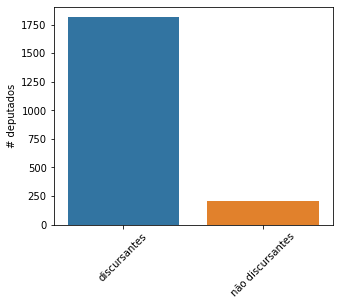

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('# deputados')
sns.barplot(data=pd.DataFrame(data=((qtd_discursantes, qtd_nao_discursantes),), columns=['discursantes', 'não discursantes'], index=[0]), ax=ax);

### Escolaridade x Discursantes x Não discursantes x Geral

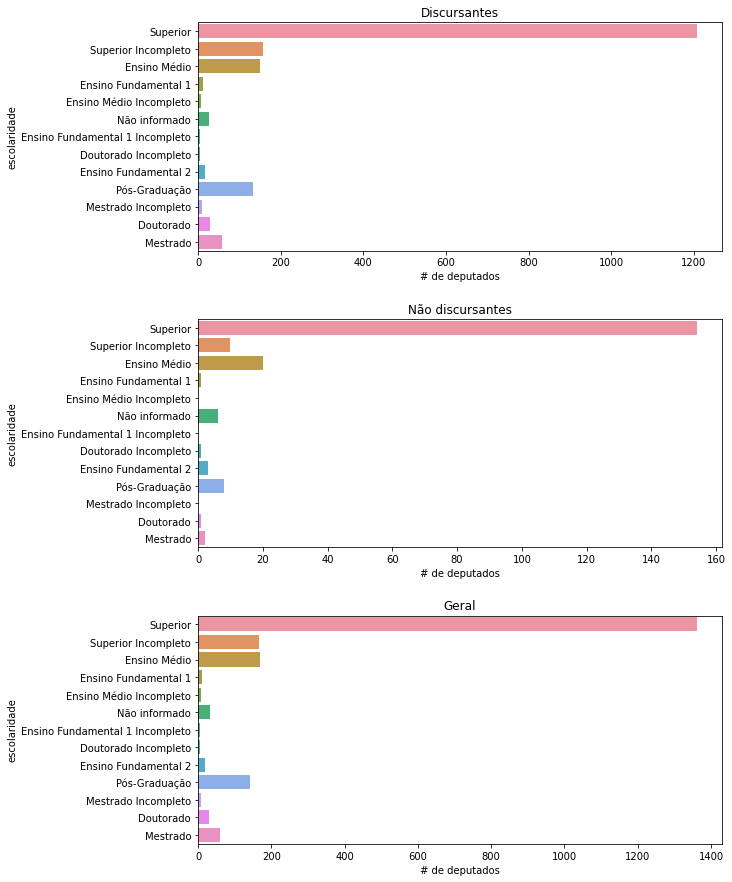

In [ ]:
fig, axis = plt.subplots(3, 1, figsize=(8,12))

fig.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.3)

ax = sns.countplot(data=discursantes, y='escolaridade', ax=axis[0], order=detalhes.escolaridade.unique())
ax.tick_params(axis='x', rotation=0)
ax.set_title('Discursantes')
ax.set(xlabel='# de deputados')

ax = sns.countplot(data=nao_discursantes, y='escolaridade', ax=axis[1], order=detalhes.escolaridade.unique())
ax.tick_params(axis='x', rotation=0)
ax.set_title('Não discursantes')
ax.set(xlabel='# de deputados')

ax = sns.countplot(data=detalhes, y='escolaridade', ax=axis[2], order=detalhes.escolaridade.unique())
ax.tick_params(axis='x', rotation=0)
ax.set_title('Geral')
ax.set(xlabel='# de deputados')

plt.show();

### Escolaridade x Quantidade de discursos

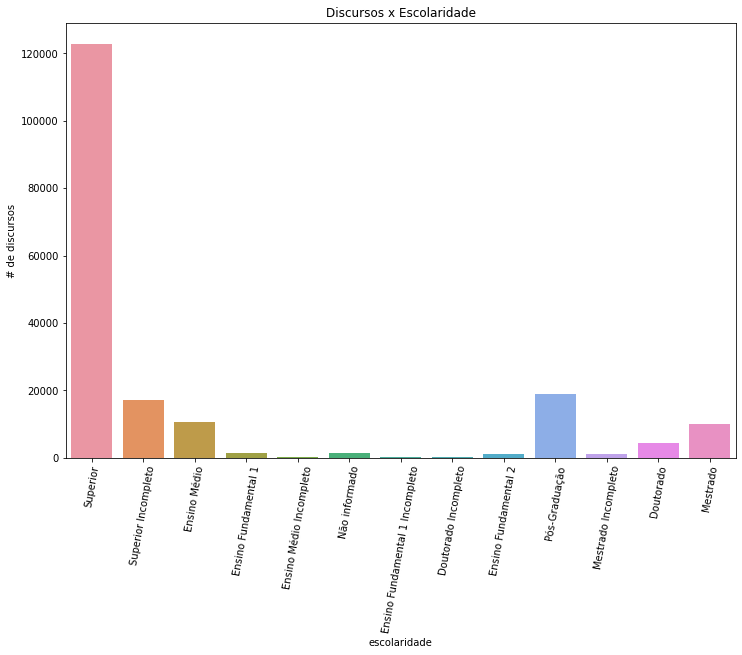

In [ ]:
fig, axis = plt.subplots(1, 1, figsize=(12,8))

ax = sns.countplot(data=consolidado, x='escolaridade', ax=axis, order=detalhes.escolaridade.unique())
ax.tick_params(axis='x', rotation=80)
ax.set_title('Discursos x Escolaridade')
ax.set(ylabel='# de discursos')

plt.show();

### Escolaridade x Tamanho do discurso

> A linha vermelha é o valor médio do tamanho dos discursos (em caracteres). É possível supor que existem alguns **outliers** nesses discursos. Suspeito de que alguns discursos carreguem a transcrição de documentos, como por exemplo, pareceres de comissões.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


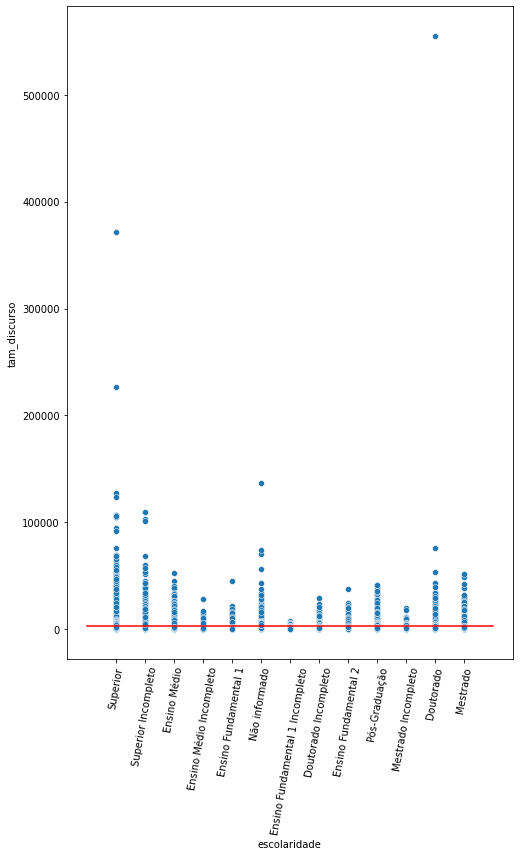

In [ ]:
fig, axis = plt.subplots(1, 1, figsize=(8,12))

ax = sns.scatterplot(data=consolidado, x='escolaridade', y='tam_discurso', ax=axis)
ax = sns.lineplot([-1,13], consolidado.tam_discurso.mean(), ax=axis, color='red')
ax.tick_params(axis='x', rotation=80)

### Sexo x Discursantes x Não discursantes x Geral

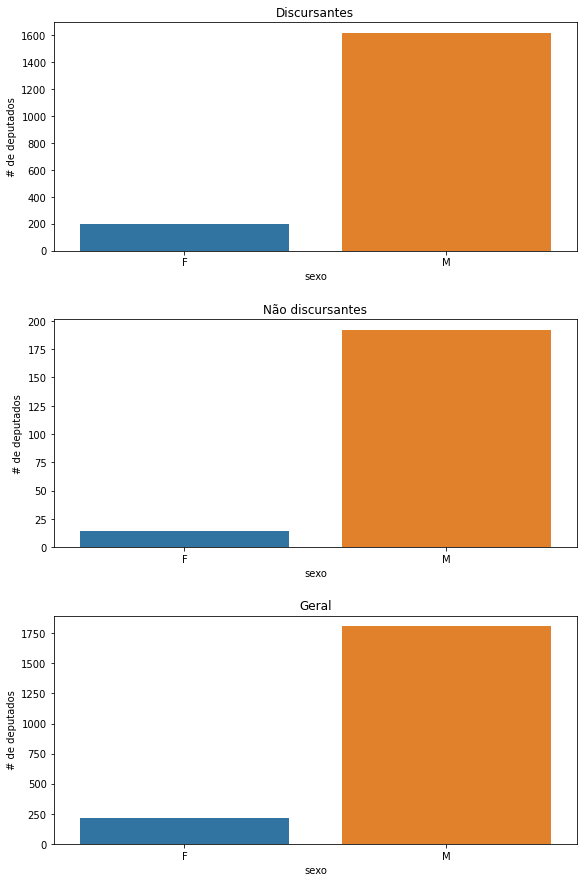

In [ ]:
fig, axis = plt.subplots(3, 1, figsize=(8,12))

fig.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.3)

ax = sns.countplot(data=discursantes, x='sexo', ax=axis[0], order=detalhes.sexo.unique())
ax.tick_params(axis='x', rotation=0)
ax.set_title('Discursantes')
ax.set(ylabel='# de deputados')

ax = sns.countplot(data=nao_discursantes, x='sexo', ax=axis[1], order=detalhes.sexo.unique())
ax.tick_params(axis='x', rotation=0)
ax.set_title('Não discursantes')
ax.set(ylabel='# de deputados')

ax = sns.countplot(data=detalhes, x='sexo', ax=axis[2], order=detalhes.sexo.unique())
ax.tick_params(axis='x', rotation=0)
ax.set_title('Geral')
ax.set(ylabel='# de deputados')

plt.show();

### Sexo x Quantidade de discursos

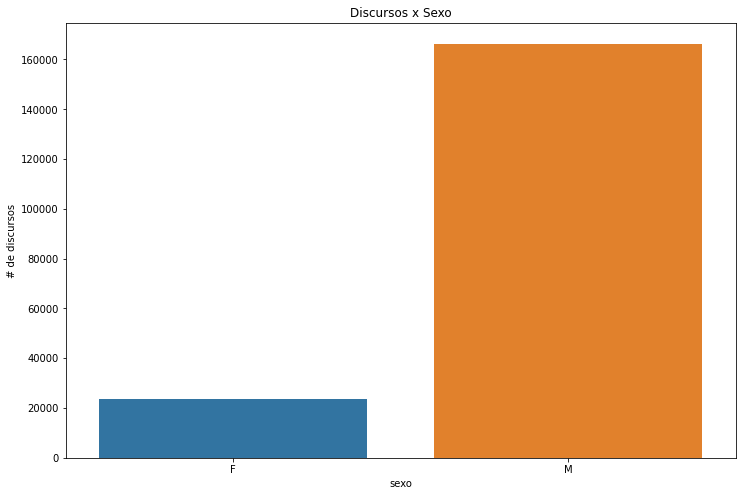

In [ ]:
fig, axis = plt.subplots(1, 1, figsize=(12,8))

ax = sns.countplot(data=consolidado, x='sexo', ax=axis, order=detalhes.sexo.unique())
ax.tick_params(axis='x', rotation=0)
ax.set_title('Discursos x Sexo')
ax.set(ylabel='# de discursos')

plt.show();

### Espectro político x Discursantes x Não discursantes x Geral

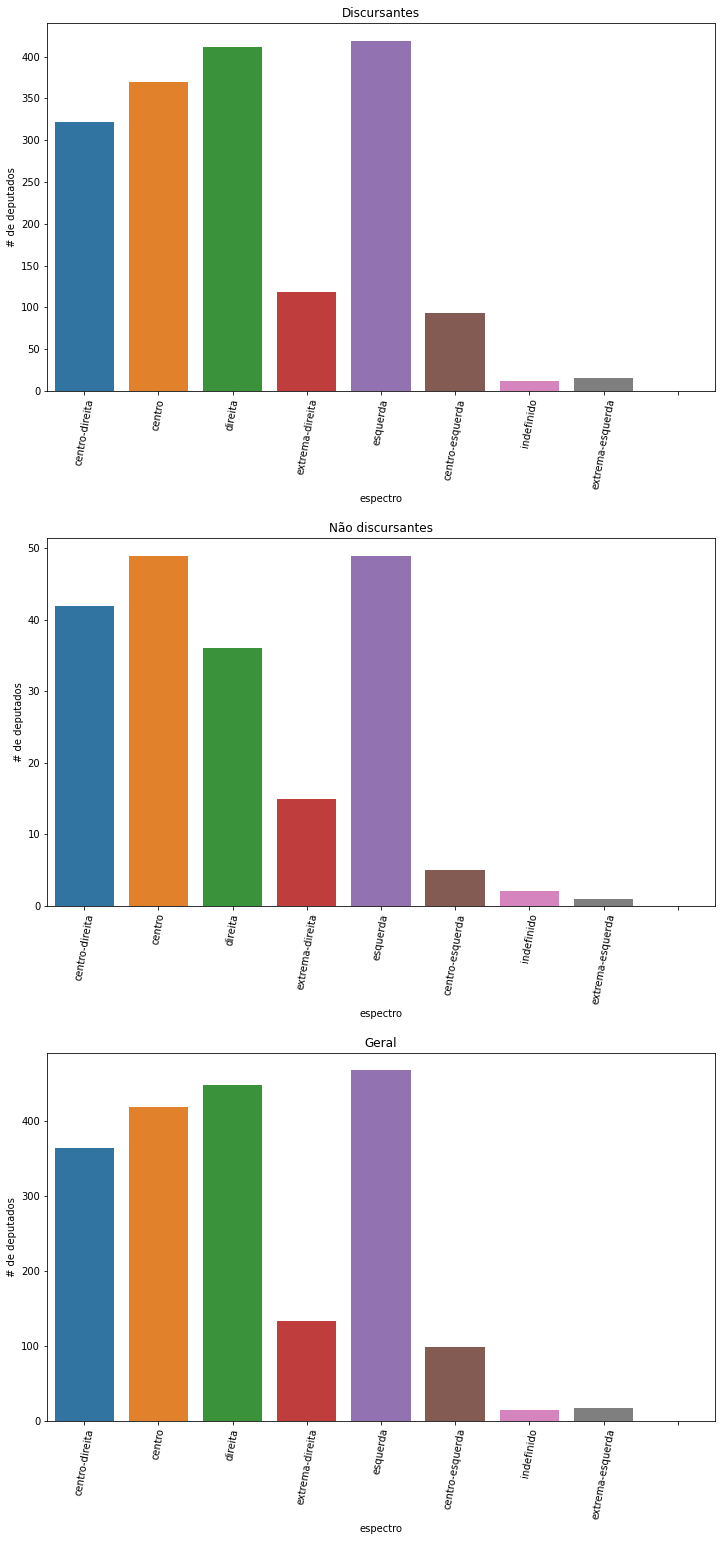

In [ ]:
fig, axis = plt.subplots(3, 1, figsize=(10,20))

fig.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.4)

ax = sns.countplot(data=discursantes, x='espectro', ax=axis[0], order=detalhes.espectro.unique())
ax.tick_params(axis='x', rotation=80)
ax.set_title('Discursantes')
ax.set(ylabel='# de deputados')

ax = sns.countplot(data=nao_discursantes, x='espectro', ax=axis[1], order=detalhes.espectro.unique())
ax.tick_params(axis='x', rotation=80)
ax.set_title('Não discursantes')
ax.set(ylabel='# de deputados')

ax = sns.countplot(data=detalhes, x='espectro', ax=axis[2], order=detalhes.espectro.unique())
ax.tick_params(axis='x', rotation=80)
ax.set_title('Geral')
ax.set(ylabel='# de deputados')

plt.show();

### Espectro político x Quantidade de discursos

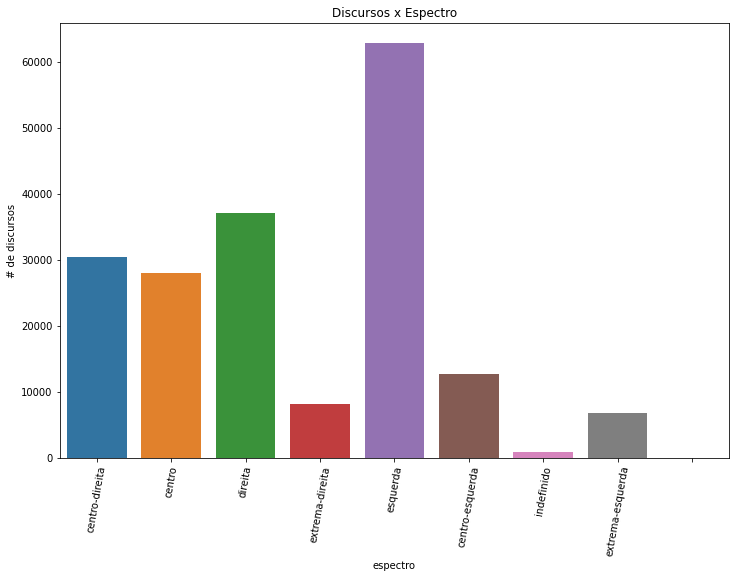

In [ ]:
fig, axis = plt.subplots(1, 1, figsize=(12,8))

ax = sns.countplot(data=consolidado, x='espectro', ax=axis, order=detalhes.espectro.unique())
ax.tick_params(axis='x', rotation=80)
ax.set_title('Discursos x Espectro')
ax.set(ylabel='# de discursos')

plt.show();

### Partido x Discursantes x Não discursantes x Geral

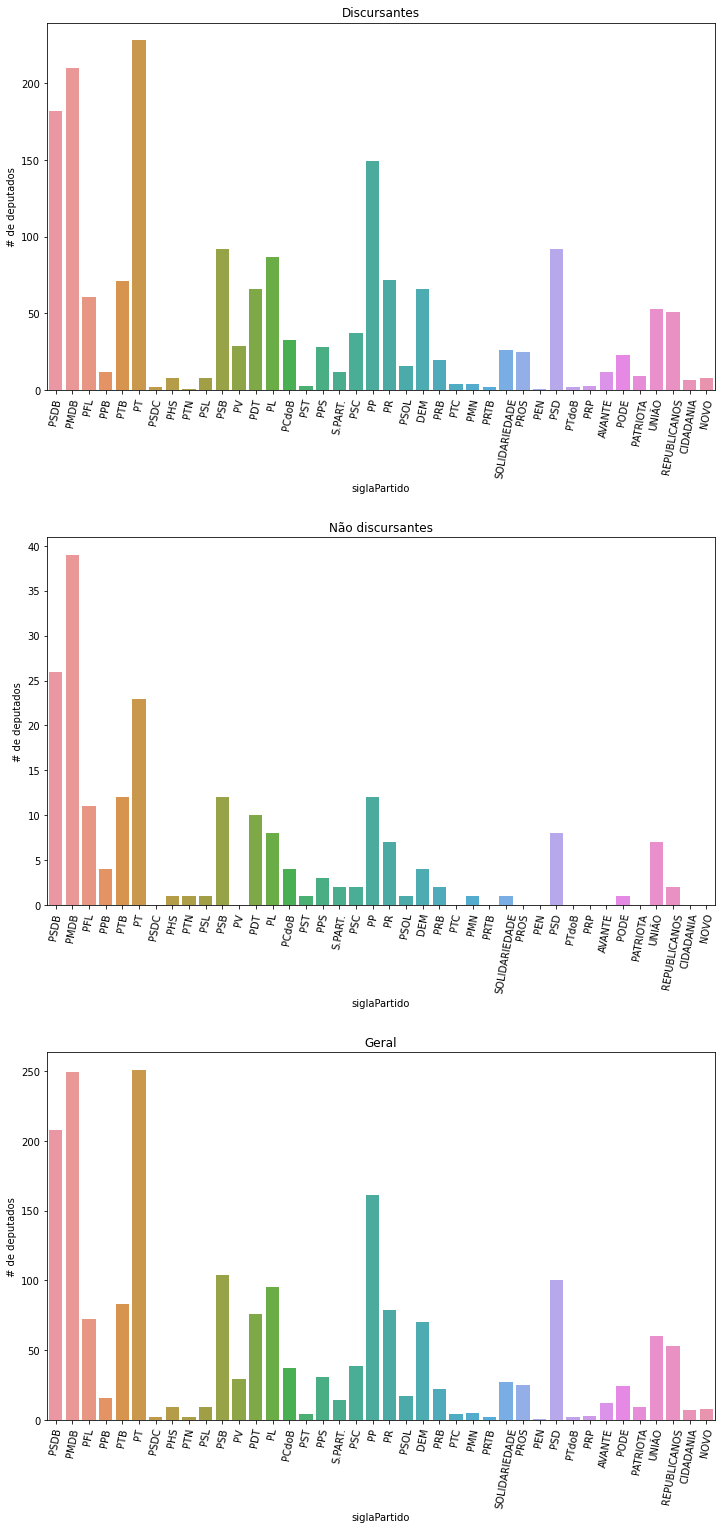

In [ ]:
fig, axis = plt.subplots(3, 1, figsize=(10,20))

fig.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.4)

ax = sns.countplot(data=discursantes, x='siglaPartido', ax=axis[0], order=detalhes.siglaPartido.unique())
ax.tick_params(axis='x', rotation=80)
ax.set_title('Discursantes')
ax.set(ylabel='# de deputados')

ax = sns.countplot(data=nao_discursantes, x='siglaPartido', ax=axis[1], order=detalhes.siglaPartido.unique())
ax.tick_params(axis='x', rotation=80)
ax.set_title('Não discursantes')
ax.set(ylabel='# de deputados')

ax = sns.countplot(data=detalhes, x='siglaPartido', ax=axis[2], order=detalhes.siglaPartido.unique())
ax.tick_params(axis='x', rotation=80)
ax.set_title('Geral')
ax.set(ylabel='# de deputados')

plt.show();

### Partido x Quantidade de discursos

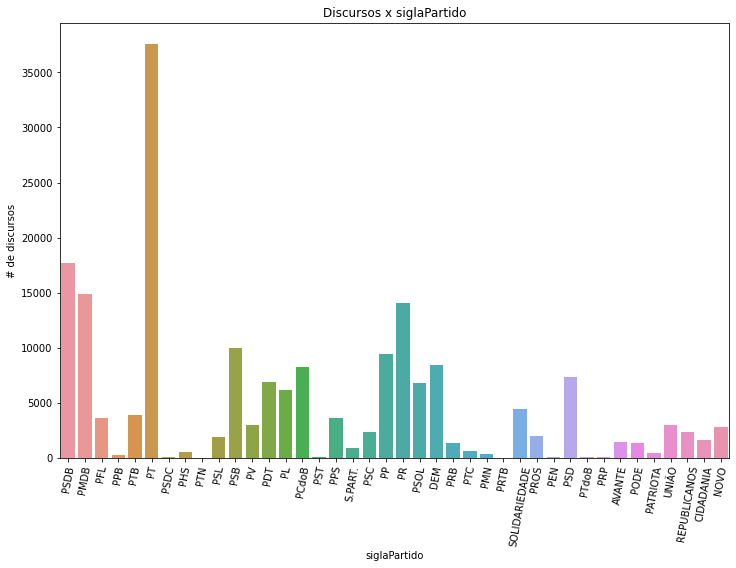

In [ ]:
fig, axis = plt.subplots(1, 1, figsize=(12,8))

ax = sns.countplot(data=consolidado, x='siglaPartido', ax=axis, order=detalhes.siglaPartido.unique())
ax.tick_params(axis='x', rotation=80)
ax.set_title('Discursos x siglaPartido')
ax.set(ylabel='# de discursos')

plt.show();